# EECE5644, Homework 2
### Ethan Holand 6/6/22

In [89]:
# Widget to manipulate plots in Jupyter notebooks
%matplotlib widget 

from sys import float_info  # Threshold smallest positive floating value

import numpy as np
import matplotlib.pyplot as plt # For general plotting

from math import ceil, floor 

from scipy.optimize import minimize
from scipy.stats import multivariate_normal # MVN not univariate

import hw2q2

np.set_printoptions(suppress=True)

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

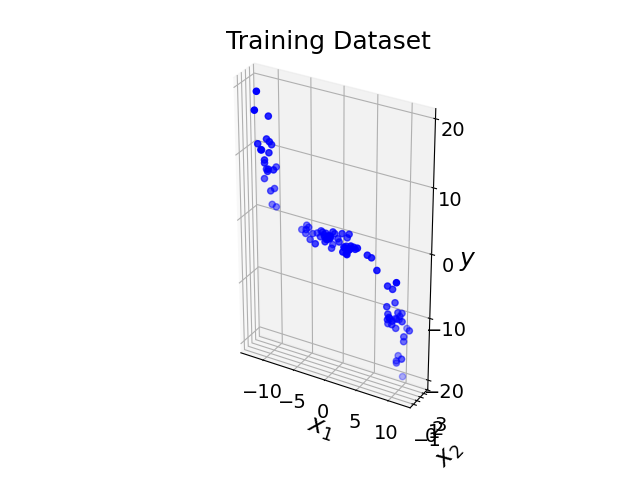

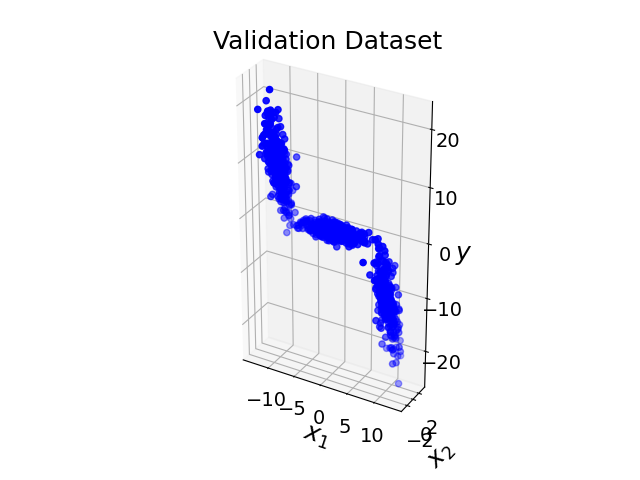

(100, 2)


In [90]:
X_train, y_train, X_valid, y_valid = hw2q2.hw2q2() 

print(np.shape(np.asarray(X_train)))

N_train = len(y_train)
N_valid = len(y_valid)

X_train = np.column_stack((np.ones(N_train), X_train))
X_valid = np.column_stack((np.ones(N_valid), X_valid))

Assume that samples are independent and identically distributed.

Derive two estimators for $\theta$ using Maximum-likelihood (ML) and maximum-a-posteriori (MAP) parameter estimation approaches as a function of these data samples.

For the MAP estimator, assume that $\theta$ has a zero-mean Gaussian prior with covariance matrix ${\gamma}I$.

## Useful functions

In [91]:
def cubic_transformation(X):
    n = X.shape[1]
    phi_X = X
    
    # Take all monic polynomials for a quadratic
    X_1 = X[:, 1]
    X_2 = X[:, 2]

    phi_X = np.column_stack((phi_X, X_1 * X_1, X_1 * X_2, X_2 * X_2, X_1*X_1*X_2, X_1*X_2*X_2, X_1*X_1*X_1, X_2*X_2*X_2))

    return phi_X

In [92]:
# Mean Squared Error (MSE) loss
def lin_reg_loss(theta, X, y):
    # Linear regression model X * theta
    predictions = X.dot(theta)
    # Residual error (X * theta) - y
    error = predictions - y
    # Loss function is MSE
    loss_f = np.mean(error**2)

    return loss_f

In [93]:
def plot3(a, b, c, name="Training", mark="o", col="b"):
    # Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(a, b, c, marker=mark, color=col)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_zlabel(r"$y$")
    plt.title("{} Dataset".format(name))
    # To set the axes equal for a 3D plot
    ax.set_box_aspect((np.ptp(a), np.ptp(b), np.ptp(c)))
    plt.show()

## Maximum Likelihood (ML) Estimation

In [94]:
def analytical_solution_mle(X, y):
    # Analytical solution is (X^T*X)^-1 * X^T * y 
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

The theoretically optimal theta paramaters from MLE are:  [-0.3993506   0.03506325  0.2527343  -0.00449423 -0.01386988  0.60370334
 -0.00096463 -0.0428286  -0.01026672 -0.1144727 ]
The average-squared error for the ML esimator is 5.583247585813242


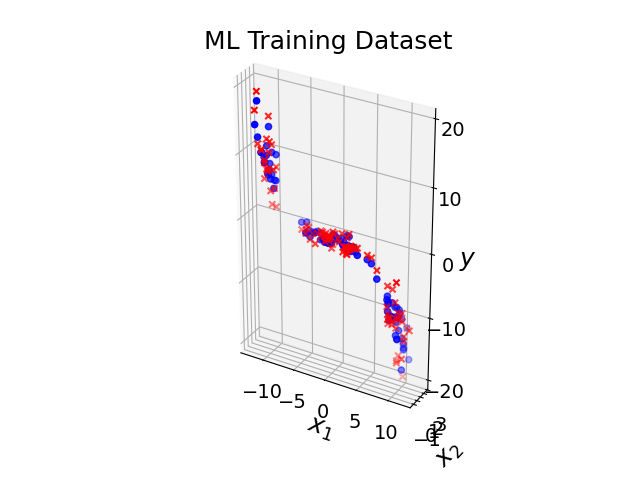

In [95]:
X_train_cube = cubic_transformation(X_train)

theta_opt_mle = analytical_solution_mle(X_train_cube, y_train)
print('The theoretically optimal theta paramaters from MLE are: ', theta_opt_mle)

analytical_preds = cubic_transformation(X_train).dot(theta_opt_mle)

mse_mle = lin_reg_loss(theta_opt_mle, cubic_transformation(X_valid), y_valid)
print('The average-squared error for the ML esimator is {}'.format(mse_mle))


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 2], analytical_preds, marker="o", color="b")
ax.scatter(X_train[:, 1], X_train[:, 2], y_train, marker='x', color='r')
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$y$")
plt.title("{} Dataset".format("ML Training"))
# To set the axes equal for a 3D plot
ax.set_box_aspect((np.ptp(X_train[:, 1]), np.ptp(X_train[:, 2]), np.ptp(y_train)))

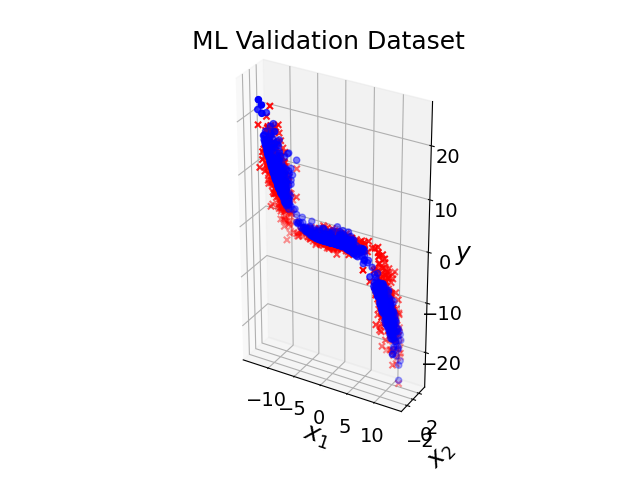

In [96]:
analytical_preds = cubic_transformation(X_valid).dot(theta_opt_mle)


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_valid[:, 1], X_valid[:, 2], analytical_preds, marker="o", color="b")
ax.scatter(X_valid[:, 1], X_valid[:, 2], y_valid, marker='x', color='r')
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$y$")
plt.title("{} Dataset".format("ML Validation"))
# To set the axes equal for a 3D plot
ax.set_box_aspect((np.ptp(X_valid[:, 1]), np.ptp(X_valid[:, 2]), np.ptp(y_valid)))

## Maximum-a-Posteriori (MAP) Estimation

In [97]:
def analytical_solution_map(X, y, gamma):
    n = np.size(np.asarray(X), axis=1)
    # Analytical solution is (X^T*X+gamma*I)^-1 * X^T * y 
    return np.linalg.inv(X.T.dot(X)+gamma*np.eye(n)).dot(X.T).dot(y)

In [98]:
theta_opt_map = analytical_solution_map(X_train_cube, y_train, 1e-4)
analytical_preds = X_train_cube.dot(theta_opt_map)
mse_map = lin_reg_loss(theta_opt_map, cubic_transformation(X_valid), y_valid)
print('The average-squared error for a MAP esimator with gamma = 1e-4 is {}'.format(mse_map))

theta_opt_map = analytical_solution_map(X_train_cube, y_train, 1e4)
analytical_preds = X_train_cube.dot(theta_opt_map)
mse_map = lin_reg_loss(theta_opt_map, cubic_transformation(X_valid), y_valid)
print('The average-squared error for a MAP esimator with gamma = 1e4 is {}'.format(mse_map))

The average-squared error for a MAP esimator with gamma = 1e-4 is 5.583240511323942
The average-squared error for a MAP esimator with gamma = 1e4 is 4.70300431469835


Plot results

<function matplotlib.pyplot.show(close=None, block=None)>

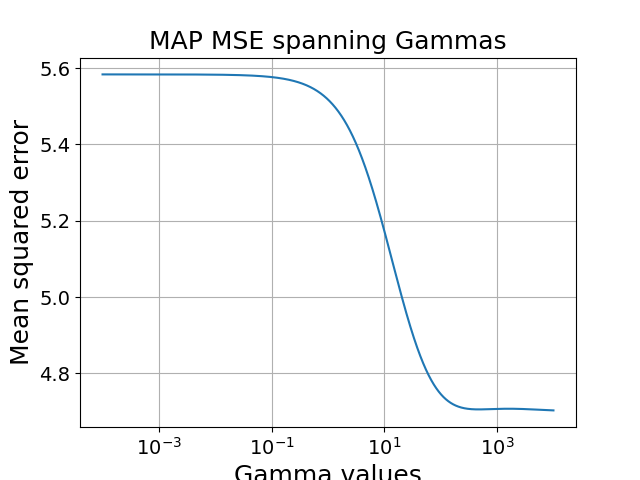

In [99]:
gammas_test = np.geomspace(1e-4, 1e4, 10000)
gammas_mse = np.zeros(len(gammas_test))

index=0
for g in gammas_test:
    theta_opt_map = analytical_solution_map(X_train_cube, y_train, g)
    analytical_preds = X_train_cube.dot(theta_opt_map)
    gammas_mse[index] = lin_reg_loss(theta_opt_map, cubic_transformation(X_valid), y_valid)
    index+=1

fig, ax = plt.subplots()
plt.plot(gammas_test, gammas_mse)
ax.set_xscale('log')
plt.xlabel('Gamma values')
plt.ylabel('Mean squared error')
plt.title('MAP MSE spanning Gammas')
plt.grid(True)
plt.show